In [36]:
# Imported Libraries

import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
import statsmodels.api as sm
from math import sqrt
#Standardization
from sklearn.preprocessing import StandardScaler

#Partioning
from sklearn.model_selection import train_test_split

#Model Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score,\
classification_report,confusion_matrix
from sklearn.metrics import brier_score_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

#Sampling
from imblearn.over_sampling import SMOTE
from collections import Counter


#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
from platform import python_version

print("Python Version:",python_version())
print("Pandas Version:",pd.__version__)
print("Numpy Version:",np.__version__)

Python Version: 3.7.1
Pandas Version: 0.23.4
Numpy Version: 1.16.4


In [37]:
# reading the data in the df object
df = pd.read_csv('E://first_tech//indian_liver_patient.csv')
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# 1. How many rows and columns are there in the data set?

In [38]:
print("The dataframe has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The dataframe has 583 rows and 11 columns


# 2. Identify and impute NAs to the mean

In [4]:
# Finding Missing values
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Only the column "Albumin_and_Globulin_Ratio" has missing values of 4

In [5]:
df['Albumin_and_Globulin_Ratio'].describe()

count    579.000000
mean       0.947064
std        0.319592
min        0.300000
25%        0.700000
50%        0.930000
75%        1.100000
max        2.800000
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [39]:
#Imputing the missing values of the column by mean.
df['Albumin_and_Globulin_Ratio'].fillna((df['Albumin_and_Globulin_Ratio'].mean()), inplace= True)

In [40]:
##Checking the Missing Values after imputation
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

# 3. Provide descriptives by health condition

##Changing the target variable as 0 and 1
## 1 -> the person is having liver disease
## 0 -> the person is not having liver disease

In [41]:
##Converting the Target variable
df['Dataset']  = np.where(df['Dataset']== 1, 1, 0)

In [42]:
#The counts of Target variable
df['Dataset'].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

In [61]:
##description of the data with respect to target variable '0'
df[df.Dataset == 0].describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,log_tot_bilirublin,log_Aspartate_Aminotransferase
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.0,167.000000,167.000000
mean,41.239521,1.142515,0.396407,219.754491,33.652695,40.688623,6.543114,3.344311,1.028588,0.0,-0.036821,3.482629
std,16.999366,1.004472,0.519255,140.986262,25.060392,36.411620,1.063042,0.783690,0.285658,0.0,0.494146,0.611283
min,4.000000,0.500000,0.100000,90.000000,10.000000,10.000000,3.700000,1.400000,0.370000,0.0,-0.693147,2.302585
25%,28.000000,0.700000,0.200000,161.500000,20.000000,21.000000,5.900000,2.900000,0.900000,0.0,-0.356675,3.044522
50%,40.000000,0.800000,0.200000,186.000000,27.000000,29.000000,6.600000,3.400000,1.000000,0.0,-0.223144,3.367296
75%,55.000000,1.100000,0.350000,213.000000,37.500000,43.500000,7.300000,4.000000,1.200000,0.0,0.095310,3.772695
max,85.000000,7.300000,3.600000,1580.000000,181.000000,285.000000,9.200000,5.000000,1.900000,0.0,1.987874,5.652489


In [62]:
##description of the data with respect to target variable '1'
df[df.Dataset == 1].describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,log_tot_bilirublin,log_Aspartate_Aminotransferase
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.0,416.000000,416.000000
mean,46.153846,4.164423,1.923558,319.007212,99.605769,137.699519,6.459135,3.060577,0.914337,1.0,0.664239,4.147111
std,15.654412,7.144831,3.206901,268.307911,212.768472,337.389980,1.094659,0.786595,0.325374,0.0,1.102751,1.057745
min,7.000000,0.400000,0.100000,63.000000,12.000000,11.000000,2.700000,0.900000,0.300000,1.0,-0.916291,2.397895
25%,34.000000,0.800000,0.200000,186.000000,25.000000,29.750000,5.700000,2.500000,0.700000,1.0,-0.223144,3.392722
50%,46.000000,1.400000,0.500000,229.000000,41.000000,52.500000,6.550000,3.000000,0.900000,1.0,0.336472,3.960768
75%,58.000000,3.625000,1.800000,315.250000,76.500000,108.750000,7.200000,3.625000,1.100000,1.0,1.287784,4.688981
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.0,4.317488,8.502891


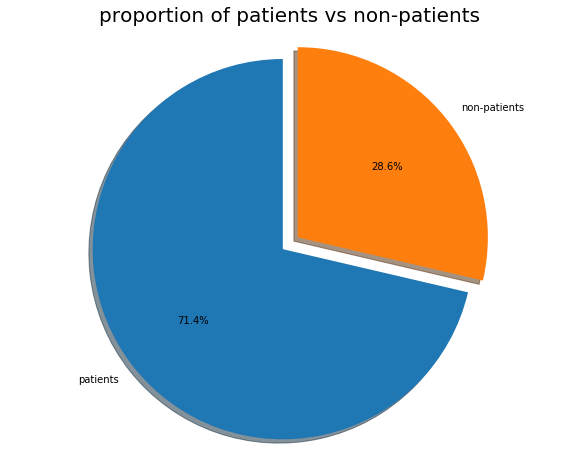

In [11]:
# proportion of patients vs non-patients
disease = [df.Dataset[df['Dataset']==1].count(), df.Dataset[df['Dataset']==0].count()]
labels = 'patients','non-patients'
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(disease, explode=explode,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("proportion of patients vs non-patients", size = 20)
plt.show()

# Plotting continuous variables

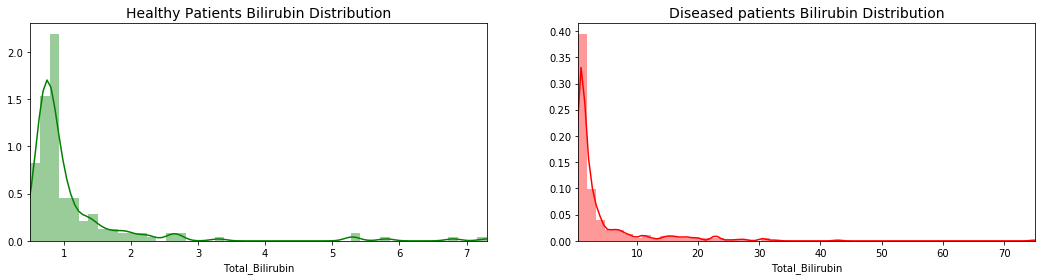

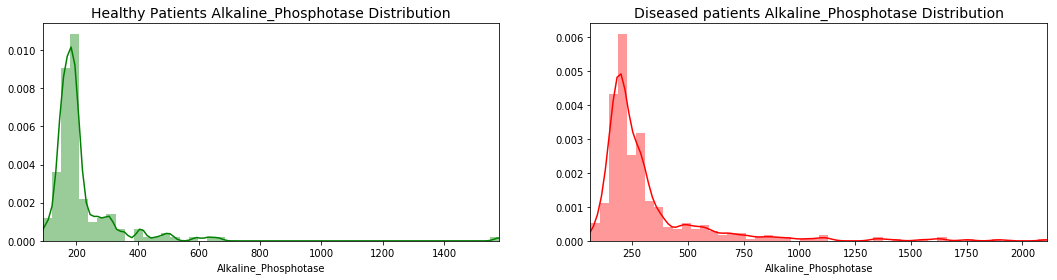

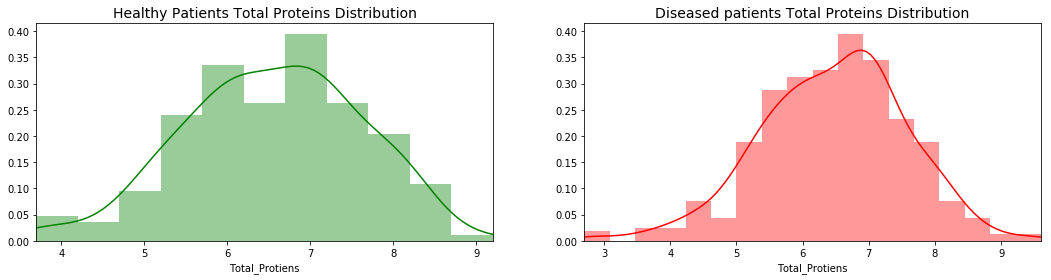

In [76]:
# Plotting continuous variables vs Target



### Total_Bilirubin vs Dataset

fig, ax = plt.subplots(1, 2, figsize=(18,4))


Bil_0 = df.loc[df['Dataset'] == 0 , 'Total_Bilirubin']
Bil_1 = df.loc[df['Dataset'] == 1 , 'Total_Bilirubin']

sns.distplot(Bil_0, ax=ax[0], color='g')
ax[0].set_title('Healthy Patients Bilirubin Distribution', fontsize=14)
ax[0].set_xlim([min(Bil_0), max(Bil_0)])

sns.distplot(Bil_1, ax=ax[1], color='r')
ax[1].set_title('Diseased patients Bilirubin Distribution', fontsize=14)
ax[1].set_xlim([min(Bil_1), max(Bil_1)])



plt.show()

#######################################################################################

##Alkaline_Phosphotase vs Dataset

fig, ax = plt.subplots(1, 2, figsize=(18,4))


Alk_0 = df.loc[df['Dataset'] == 0 , 'Alkaline_Phosphotase']
Alk_1 = df.loc[df['Dataset'] == 1 , 'Alkaline_Phosphotase']

sns.distplot(Alk_0, ax=ax[0], color='g')
ax[0].set_title('Healthy Patients Alkaline_Phosphotase Distribution', fontsize=14)
ax[0].set_xlim([min(Alk_0), max(Alk_0)])

sns.distplot(Alk_1, ax=ax[1], color='r')
ax[1].set_title('Diseased patients Alkaline_Phosphotase Distribution', fontsize=14)
ax[1].set_xlim([min(Alk_1), max(Alk_1)])



plt.show()

#######################################################################################

##Total Proteins vs Data_Set

fig, ax = plt.subplots(1, 2, figsize=(18,4))


TP_0 = df.loc[df['Dataset'] == 0 , 'Total_Protiens']
TP_1 = df.loc[df['Dataset'] == 1 , 'Total_Protiens']

sns.distplot(TP_0, ax=ax[0], color='g')
ax[0].set_title('Healthy Patients Total Proteins Distribution', fontsize=14)
ax[0].set_xlim([min(TP_0), max(TP_0)])

sns.distplot(TP_1, ax=ax[1], color='r')
ax[1].set_title('Diseased patients Total Proteins Distribution', fontsize=14)
ax[1].set_xlim([min(TP_1), max(TP_1)])

plt.show()

Inference:
Total_bilirubin vs dataset: 
For the plot with healthy patients are having low range of values of 1 to 7 where as diseased patients have range of 10 to 70 bilirubin.

Alkaline_phosphotase vs dataset:
The distribution of both health condition are skewed. The diseased patients have more Alkaline Phosphotase.

Total_proteins vs dataset:
Bothe the health condition distribution looks normal, the diseased patients health condition is little skewed. There are more data samples near mean.


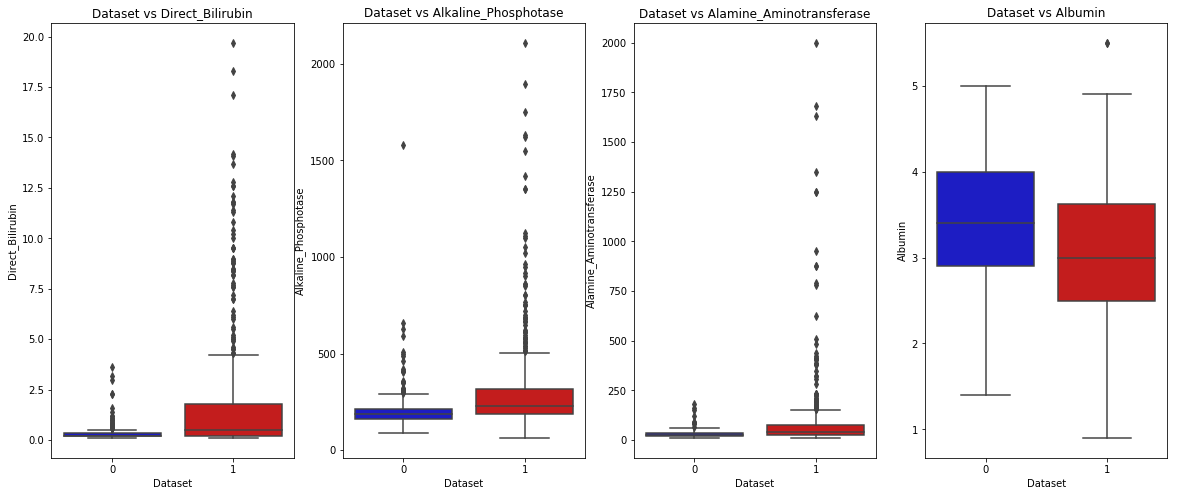

In [74]:
##Boxplot for the predictors Direct_Bilirubin, Aljaline_phosphotase, Alamine_Aminotransferase, Albumin  VS 'Data_set'

f, axes = plt.subplots(ncols=4, figsize=(20,8))
colors = ["#0101DF", "#DF0101"]
sns.boxplot(x="Dataset", y="Direct_Bilirubin", data=df, palette=colors, ax=axes[0])
axes[0].set_title('Dataset vs Direct_Bilirubin')


sns.boxplot(x="Dataset", y="Alkaline_Phosphotase", data=df, palette=colors, ax=axes[1])
axes[1].set_title('Dataset vs Alkaline_Phosphotase')


sns.boxplot(x="Dataset", y="Alamine_Aminotransferase", data = df, palette=colors, ax=axes[2])
axes[2].set_title('Dataset vs Alamine_Aminotransferase')


sns.boxplot(x="Dataset", y="Albumin", data= df, palette=colors, ax=axes[3])
axes[3].set_title('Dataset vs Albumin')

plt.show()

Inference:
Direct Bilirubin vs dataset:
The group which has liver disease has higher mean of direct_bilirubin than the one which doesnt have. There are more outliers present in the group of people who has disease


Alkaline-phosphotate vs dataset:
The group which has liver disease has higher mean of Alkaline_phosphotase than the one which doesnt have. There are more outliers present in the group of people who has disease

Albumin vs Dataset:

The group which doesnt have liver disease has higher mean than the group which has the disease.Therefore the healthy people have more Albumin content.


# Data exploration with respect to AGE

I have created Age groups to get more granularity on the data.



In [43]:
##Creating the Age groups from the Age column
df['Agegroups']  = pd.cut(df['Age'],[0, 15, 30, 45, 60, 75, 90], labels =['0-15','15-30','30-45','45-60','60-75','75-90'])

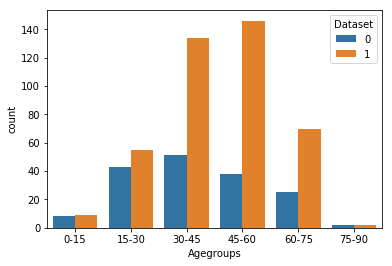

In [44]:
##Plotting the count plot for agegroups and target variable
sns.countplot('Agegroups', hue='Dataset', data = df)

Inference: People whose age between 30 to 60 are more prone to have a liver disease.

Creating a distribution for 'age' column with respect to target variable.

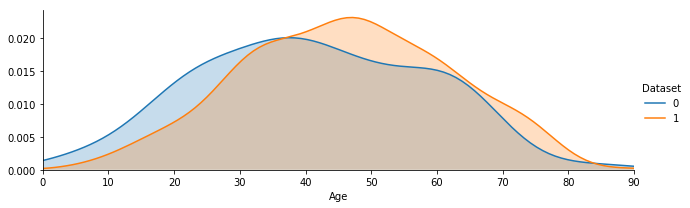

In [15]:
facet = sns.FacetGrid(df, hue="Dataset",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, df["Age"].max()))
facet.add_legend()

From the distribution we can say that the people whose age us above 35 and below 60 are more prone to have a liver disease.

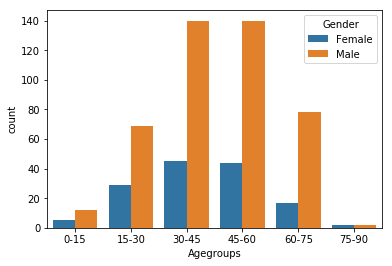

In [16]:
sns.countplot('Agegroups', hue='Gender', data = df)

The proportion of Males are higher in all age groups

# 5. Check statistical significance of gender on health condition

In [15]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats

Null Hypothesis: The Gender and Dataset varaibles are independent - (which means they are not associated)
Alternate Hypothesis: The Gender and Dataset variables are dependent - (which means they are associated)

In [16]:
stats, p, dof, expected = chi2_contingency(pd.crosstab(df.Gender, df.Dataset))

In [8]:
stats

3.5466486106706046

In [108]:
p

0.059665846857774464

In [109]:
pd.crosstab(df.Gender, df.Dataset)

Dataset,0,1
Gender,,
0,50,92
1,117,324


In [7]:
expected

array([[ 40.67581475, 101.32418525],
       [126.32418525, 314.67581475]])

The alpha is 0.05. In this case the p-value is greater than alpha. so we failed to reject the null hypothesis.
The difference is very less (0.009), still we accpet the null hypothesis. The Gender and Target variable are independent of each other.

I have done this calculation manually and checked the p-value. The chi value which I got is 3.6, and the corresponding p-value to the chi is little greater than 0.05.

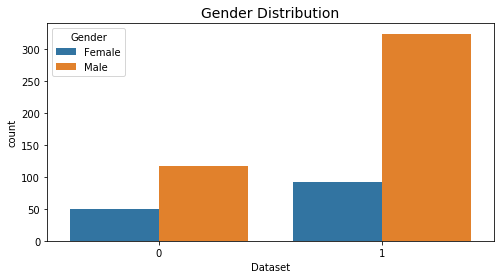

In [78]:
##Creating the count plot for gender vs target variable
a4_dims = (8,4)
fig, ax = plt.subplots(figsize = a4_dims)
sns.countplot(x = df['Dataset'], hue = df['Gender'], ax = ax)
plt.title('Gender Distribution', fontsize = 14);

In [79]:
##Creating the cross tab for the gender vs target variable
df.groupby(['Gender','Dataset'])['Dataset'].count()

Gender  Dataset
Female  0           50
        1           92
Male    0          117
        1          324
Name: Dataset, dtype: int64

# 6. Show your work on feature engineering and correlation analysis

# Creating Correlation plot before feature engineering

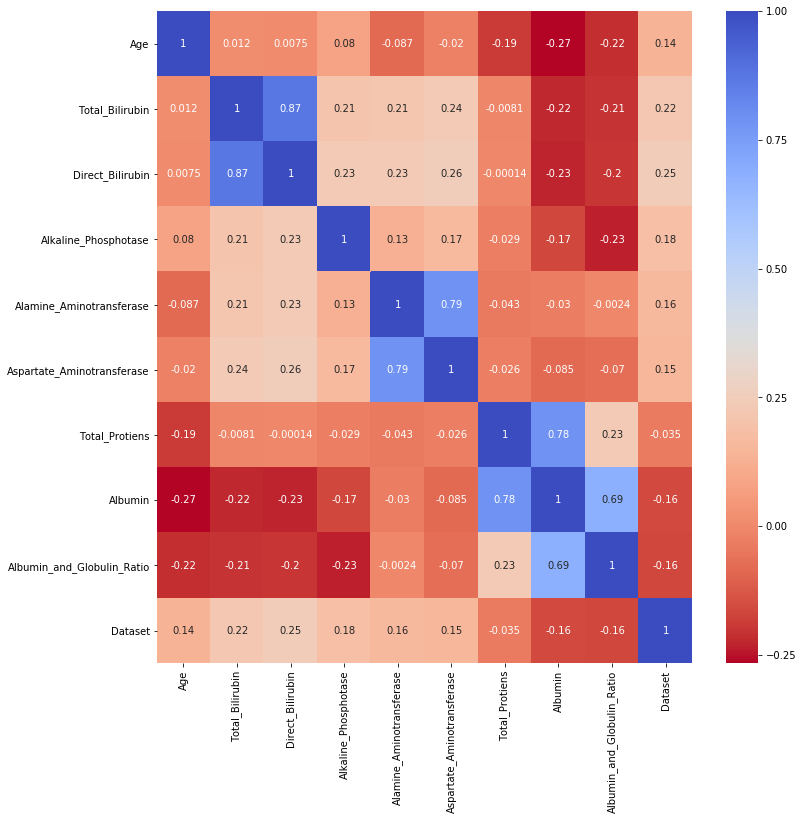

In [12]:
data_corr = df.corr()
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(data_corr, cmap = 'coolwarm_r',annot=True)
plt.show()

#The above correlation also indicates the following correlation

Total_Protiens & Albumin


Alamine_Aminotransferase & Aspartate_Aminotransferase

Direct_Bilirubin & Total_Bilirubin


There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

# Transforming Variables

Skewed data can mess up the power of your predictive model if it is not address it correctly.

I am creating the new variables: 1.The log transformation of 'Total_Bilirublin' 2. log transformation of 'Asparate_Aminotransferase'

In [45]:
##Creating the new variable 'log_tot_bilirublin' from the original variable 'Total_Bilirublin'
df['log_tot_bilirublin'] = np.log(df.Total_Bilirubin)

In [46]:
##Checking the skewness of new variable 
df['log_tot_bilirublin'].skew()

1.3184951387083406

In [47]:
##Skewness of the original Variable 
df['Total_Bilirubin'].skew()

4.90747399372197

By Taking the log transformation we were able to reduce the skewness from 4.9 to 1.31

In [48]:
##Creating the log transformation of Aspartate_Aminotransferase
df['log_Aspartate_Aminotransferase'] = np.log(df.Aspartate_Aminotransferase)

In [49]:
##Checking the skewness of Aspartate_Aminotransferase
df['log_Aspartate_Aminotransferase'].skew()

1.194898273804399

In [50]:
##Checking the skewness of the original variable.
df['Aspartate_Aminotransferase'].skew()

10.54617721691247

By taking log transformation we were able to reduce the skewness from 10.54 to 1.19

Now lets create a Boxcox transformation on 'Direct_Bilirubin'

In [51]:
from scipy.stats import boxcox
df['Direct_Bilirubin'], lmbda = boxcox(df['Direct_Bilirubin'], lmbda = None)

Skewness reduced drastically  after transformation

In [52]:
df['Direct_Bilirubin'].skew()

0.18165693349980874

Now, Lets try the Boxcox transformation on 'Alkaline_Phosphotase'

In [53]:
df['Alkaline_Phosphotase'].skew()

3.7651063973073766

In [54]:
df['Alkaline_Phosphotase'], lmbda = boxcox(df['Alkaline_Phosphotase'], lmbda = None)

In [55]:
df['Alkaline_Phosphotase'].skew()

-0.04866333524667735

Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

After the transformation of Boxcox the the variable is slightly left skewed.

# Feature engineering

We can create many multiplicative interactive terms. 

For example, there are 7 numerical predictors excluding "Albumin_and_Globulin_Ratio".

We can create multiple Interaction terms(combination of 7 terms) like creating new terms by multiplying pair of predictors or three set of predictors or four set of predictors etc…

Here I am planning to create one intreactive term.


Note: I have created only one interactive term because I tried creating multiple interactive terms, When I checked the correlation matrix, the correlation between the interactive terms and the original terms were almost are high(0.8 to 0.9). The Correlation between the new term and exsisting terms were also increasing

In [56]:
##Ratio of Amniotransferase
df['aminotransferase'] = df['Alamine_Aminotransferase'] / df['log_Aspartate_Aminotransferase']

In [57]:
df['aminotransferase'] = np.log(df.aminotransferase)

Creating a new column with age band with the value 1 to 6

In [58]:
df['AgeBand'] = df['Agegroups'].map( {'0-15' : 1, '15-30' : 2, '30-45': 3, '45-60': 4, '60-75': 5, '75-90': 6}).astype('int')

# PRE-PROCESSING

Converting the Gender column into 0's and 1's

In [59]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
# Assigning numerical values and storing in another column
df['Gender'] = le_gender.fit_transform(df['Gender'])

Since we have the log terms of Total_Bilirubin and Asparate_Aminotransferase we can delete those terms

When you see the Correlation matrix the Direct_Bilirubin has highly correlated to total_bilirubin, and Albumin is correlated to total_proteins so removing those columns 

In [60]:
df.drop(['Total_Bilirubin','Aspartate_Aminotransferase','Direct_Bilirubin','Albumin','Agegroups'],axis = 1,inplace = True)

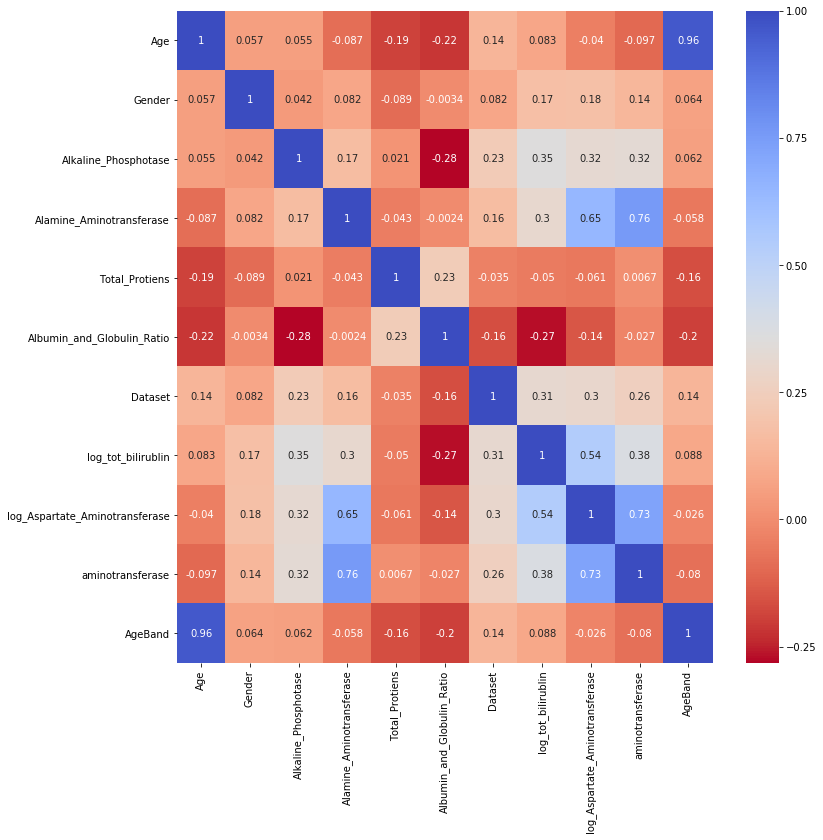

In [33]:
data_corr = df.corr()
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(data_corr, cmap = 'coolwarm_r',annot=True)
plt.show()

In [61]:
df = pd.get_dummies(df, columns =['AgeBand'], drop_first=True)

Outlier Treatment:
I have done the log transformation to reduce the skewness in the data.

Since we have only 583 samples, Removing outliers can decrease the sample size, which might lead to overfitting of the data.

# RECURSIVE FEATURE ELIMINATION

In [33]:
df.shape

(583, 15)

In [34]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [62]:
X = df.drop('Dataset', axis = 1)

In [63]:
Y = df.Dataset

In [40]:
model = RandomForestClassifier(criterion = 'entropy',random_state=101)
rfe = RFECV(estimator=model, step=1, cv=StratifiedKFold(10), scoring='accuracy')

In [41]:
rfe.fit(X, Y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='entropy', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [42]:
##Getting the Feature importance values
rfe.estimator_.feature_importances_

array([0.1071124 , 0.02200222, 0.1677069 , 0.11218103, 0.10779688,
       0.08795407, 0.10865396, 0.11548751, 0.14213769, 0.00918299,
       0.01298519, 0.00679917])

In [43]:
##Getting which variables are most important
print("Selected Features: %s" % rfe.support_)

Selected Features: [ True  True  True  True  True  True  True  True  True False  True  True
  True False]


The importance variables listed in Descending order

1.age,


2.alkaline phosphate,


3.alamine_aminotransferase,


4.total_proteins,


5.log_tot_bilirublin,


6.log_asparate_aminotransferase,


7.Albumin_and_globulin_ratio,


8.gender

# 9. Consider whether you will address class imbalance

For the given data samples, I would not be performing class Imbalance. The proportion of target variable in the data set is 71.5(1's) and 28.6(0's).
The class imbalance will be addressed only when the proportion of one class in the target is less than or equal to 5 to 10 percent. [depends on the size of the dataset]


# Modeling

I am removing the Ageband5 and Ageband6 from the analysis as its feature importance value is very less

In [64]:
X.drop(['AgeBand_5','AgeBand_6','Albumin_and_Globulin_Ratio'],axis = 1,inplace = True)

In [65]:
X.columns

Index(['Age', 'Gender', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Total_Protiens', 'log_tot_bilirublin',
       'log_Aspartate_Aminotransferase', 'aminotransferase', 'AgeBand_2',
       'AgeBand_3', 'AgeBand_4'],
      dtype='object')

In [66]:
##Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size=0.3, random_state=17)

I have used Four models

Logistic Regression
KNN – K Nearest Neighbour
Random Forest
Light Gradient Boosting


Evaluation metrics:
Accuracy,
ROC-AUC curve,
Recall.
I am using Recall as a one of the important metric because we are dealing with medical records and no diseased person should be modeled as non-diseased person

False Negative should be Least


# LOGISTIC REGRESSION

In [67]:
Logistic_Regression = LogisticRegression()

In [68]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [ 0.01, 0.1, 1]}
#Type of regularization and the penalty


grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [50]:
log_reg = grid_log_reg.best_estimator_

In [70]:
y_pred_log = grid_log_reg.predict(X_test)

The best parameters for logistic regression is with l2 penalty and regularization value c = 0.01

Implementing Cross -validation on the  logistic regression
k fold cross validation:

In 5 fold cross validation, the dataset is divided into 5 different groups. The first dataset in each group is taken as a validation dataset and the remaining 4 datasets are considered as training datasets.

In [71]:
def classification_metrics(y_test,y_pred):

    print('the classification report for the model is : \n ', classification_report(y_test, y_pred))
    
    print('the recall value fo rthe model is :  %.2f ' % recall_score(y_test,y_pred))
   
    print('the precision value of the model is:  %.2f ' % precision_score(y_test,y_pred))
   
    print('the roc-auc score of the model is:  %.2f ' % roc_auc_score(y_test, y_pred))
    
    print('the accuracy score of the model is: %.2f' % accuracy_score(y_test, y_pred))
    
    print('the classification error of the model is: %.2f' % (1 - accuracy_score(y_test, y_pred)))
    
    print('the brier score for the model is: %.2f' % brier_score_loss(y_test, y_pred))

In [72]:
classification_metrics(y_test, y_pred_log)

the classification report for the model is : 
                precision    recall  f1-score   support

           0       0.64      0.18      0.28        50
           1       0.75      0.96      0.84       125

    accuracy                           0.74       175
   macro avg       0.69      0.57      0.56       175
weighted avg       0.72      0.74      0.68       175

the recall value fo rthe model is :  0.96 
the precision value of the model is:  0.75 
the roc-auc score of the model is:  0.57 
the accuracy score of the model is: 0.74
the classification error of the model is: 0.26
the brier score for the model is: 0.26


In [73]:
def plotting_confusion_matrix(y_test,y_pred):
    matrix =  confusion_matrix(y_test,y_pred)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    return matrix

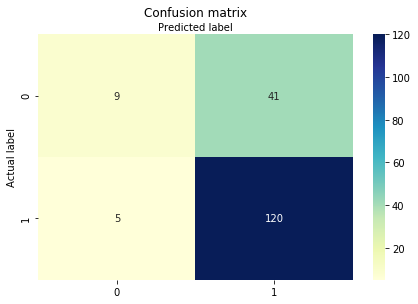

array([[  9,  41],
       [  5, 120]], dtype=int64)

In [74]:
plotting_confusion_matrix(y_test,y_pred_log)

In [75]:
def roc_auc_curve(y_test,y_pred):
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr,tpr, thresold = roc_curve(y_test,y_pred)
    plt.figure()
    plt.plot(fpr, tpr, label='model (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('ROC')
    plt.show()
    
    return roc_auc

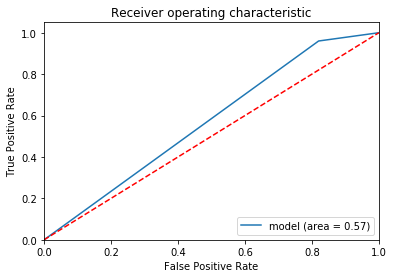

0.5700000000000001

In [76]:
roc_auc_curve(y_test,y_pred_log)

# RANDOM FOREST CLASSIFER

In [77]:
rfc = RandomForestClassifier()

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

grid_rfc = GridSearchCV(rfc, tree_params)
grid_rfc.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [78]:
grid_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
y_pred_rfc = grid_rfc.predict(X_test)

In [82]:
classification_metrics(y_test, y_pred_rfc)

the classification report for the model is : 
                precision    recall  f1-score   support

           0       0.67      0.04      0.08        50
           1       0.72      0.99      0.84       125

    accuracy                           0.72       175
   macro avg       0.69      0.52      0.46       175
weighted avg       0.71      0.72      0.62       175

the recall value fo rthe model is :  0.99 
the precision value of the model is:  0.72 
the roc-auc score of the model is:  0.52 
the accuracy score of the model is: 0.72
the classification error of the model is: 0.28
the brier score for the model is: 0.28


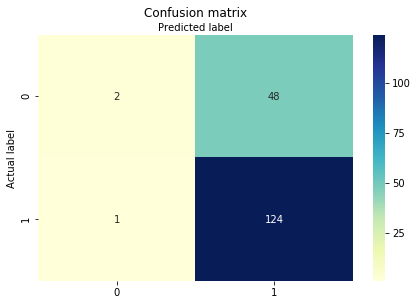

array([[  2,  48],
       [  1, 124]], dtype=int64)

In [83]:
plotting_confusion_matrix(y_test,y_pred_rfc)

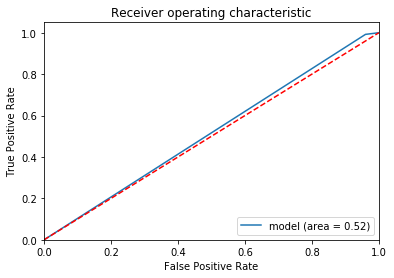

0.516

In [84]:
roc_auc_curve(y_test,y_pred_rfc)

Creating the feature importance plot

In [93]:
rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 5, min_samples_split = 2)

In [94]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
#Column Contribution
col_significance = pd.DataFrame(X.columns.delete(0))
col_significance.columns = ['X']
col_significance["Column_Contribution"] = pd.Series(rfc.feature_importances_)

col_significance.sort_values(by='Column_Contribution', ascending=False)

,X,Column_Contribution
5,log_Aspartate_Aminotransferase,0.250093
3,Total_Protiens,0.161999
6,aminotransferase,0.151551
2,Alamine_Aminotransferase,0.147763
7,AgeBand_2,0.112502
0,Gender,0.083575
4,log_tot_bilirublin,0.039819
8,AgeBand_3,0.024797
1,Alkaline_Phosphotase,0.007777
9,AgeBand_4,0.004399


# KNN

In [87]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
#number of neightbours and optimization method

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

grid_knears.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [90]:
y_pred_knn = grid_knears.predict(X_test)

In [91]:
classification_metrics(y_test, y_pred_knn)

the classification report for the model is : 
                precision    recall  f1-score   support

           0       0.38      0.36      0.37        50
           1       0.75      0.76      0.75       125

    accuracy                           0.65       175
   macro avg       0.56      0.56      0.56       175
weighted avg       0.64      0.65      0.64       175

the recall value fo rthe model is :  0.76 
the precision value of the model is:  0.75 
the roc-auc score of the model is:  0.56 
the accuracy score of the model is: 0.65
the classification error of the model is: 0.35
the brier score for the model is: 0.35


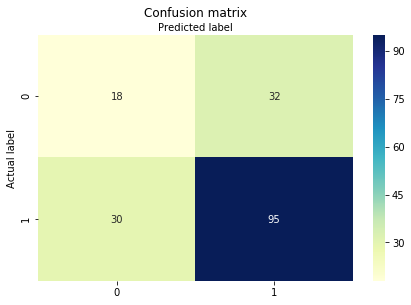

array([[18, 32],
       [30, 95]], dtype=int64)

In [92]:
plotting_confusion_matrix(y_test,y_pred_knn)

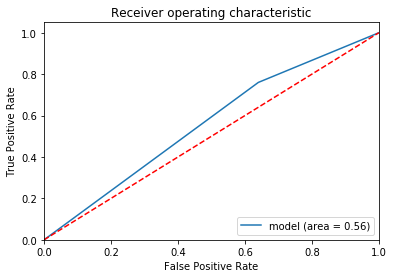

0.5599999999999999

In [93]:
roc_auc_curve(y_test,y_pred_knn)

# LIGHT GRADIENT BOOSTING

In [94]:
from lightgbm import LGBMClassifier

lgb_train = lgb.Dataset(X_train, label = y_train)

lgb_clf = LGBMClassifier(random_state = 17,boosting_type='dart')

lgb_clf.fit(X_train, y_train)

y_pred_lgb = lgb_clf.predict(X_test)

In [95]:
classification_metrics(y_test, y_pred_lgb)

the classification report for the model is : 
                precision    recall  f1-score   support

           0       0.49      0.40      0.44        50
           1       0.78      0.83      0.80       125

    accuracy                           0.71       175
   macro avg       0.63      0.62      0.62       175
weighted avg       0.69      0.71      0.70       175

the recall value fo rthe model is :  0.83 
the precision value of the model is:  0.78 
the roc-auc score of the model is:  0.62 
the accuracy score of the model is: 0.71
the classification error of the model is: 0.29
the brier score for the model is: 0.29


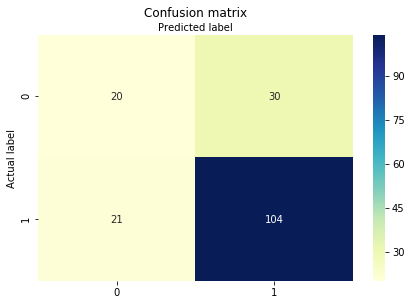

array([[ 20,  30],
       [ 21, 104]], dtype=int64)

In [96]:
plotting_confusion_matrix(y_test,y_pred_lgb)

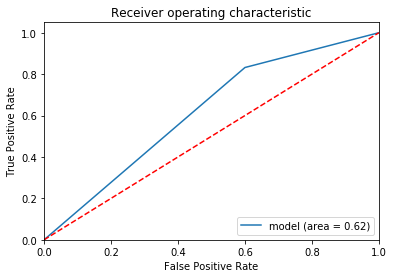

0.616

In [97]:
roc_auc_curve(y_test,y_pred_lgb)

# ENSEMBLE MODEL

I am planning to create a emsemble model with three classifiers. KNN, Random Forest, Logistic regression.

I didnt use Light graident boosting because the data set is not so complex and the performance of Boosting was little less compare to the other algorithms.

I have used voting classifier technique as ensemble model.


Voting Classifier:

The model is trained using diverse algorithmns in this case we use Logistic regression, Random Forest and KNN.
models are pitted against each other and selected upon best performance by voting


Hard voting is where a model is selected from an ensemble to make the final prediction by a simple majority vote for accuracy.


In [98]:
from sklearn.ensemble import VotingClassifier

In [99]:
##Preparing the list of algorithms to be used in the ensemble model
knn = KNeighborsClassifier()
log_reg = LogisticRegression()
rfc_best = grid_rfc.best_estimator_
knn_best = grid_knears.best_estimator_
log_reg = grid_log_reg.best_estimator_

In [100]:
##Cresating a list of models
estimators=[('knn', knn_best), ('rfc', rfc_best), ('log_reg', log_reg)]

In [101]:

ensemble = VotingClassifier(estimators, voting = 'hard')

In [102]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=3,
                                                   p=2, weights='uniform')),
                             ('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=2,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,


In [103]:
ensemble.score(X_test, y_test)

0.7314285714285714

In [104]:
y_pred_ensemble = ensemble.predict(X_test)

In [105]:
classification_metrics(y_test, y_pred_ensemble)

the classification report for the model is : 
                precision    recall  f1-score   support

           0       0.71      0.10      0.18        50
           1       0.73      0.98      0.84       125

    accuracy                           0.73       175
   macro avg       0.72      0.54      0.51       175
weighted avg       0.73      0.73      0.65       175

the recall value fo rthe model is :  0.98 
the precision value of the model is:  0.73 
the roc-auc score of the model is:  0.54 
the accuracy score of the model is: 0.73
the classification error of the model is: 0.27
the brier score for the model is: 0.27


In [106]:
confusion_matrix(y_test,y_pred_ensemble)

array([[  5,  45],
       [  2, 123]], dtype=int64)

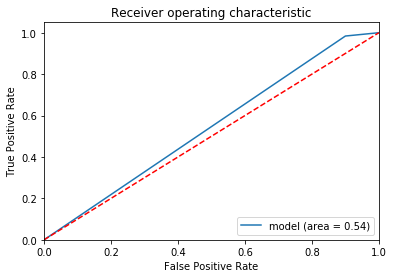

0.542

In [107]:
roc_auc_curve(y_test,y_pred_ensemble)

CONCLUSION

The Ensemble model gives us better Accuracy and Recall value.
Accuracy of the model: 73
Recall: 0.98
    
The False negative rates are very less.